In [16]:
import pandas as pd
import jieba
import jieba.analyse
import numpy
from collections import Counter
import plotly.express as px
data = pd.read_csv('機車.csv', encoding='BIG5')
data

,編號,案類,發生日期,發生時段,發生地點
0,1,機車竊盜,1070101,02~04,臺北市中山區新生北路3段31 - 60號
1,2,機車竊盜,1070101,11~13,臺北市大安區敦化南路二段181 - 210號
2,3,機車竊盜,1070101,08~10,臺北市文山區辛亥路4段61 - 90號
3,4,機車竊盜,1070102,20~22,臺北市大安區敦化南路2段1 - 30號
4,5,機車竊盜,1070102,05~07,臺北市萬華區水源路181 - 210號
...,...,...,...,...,...
2026,2031,機車竊盜,1120308,02~04,臺北市萬華區環河南路三段61~90號
2027,2032,機車竊盜,1120225,05~07,臺北市萬華區環河南路三段61~90號
2028,2033,機車竊盜,1120325,23~01,臺北市萬華區桂林路242巷1~30號
2029,2034,機車竊盜,1110803,08~10,臺北市萬華區和平西路三段382巷12弄31~60號


In [45]:
data['seg'] = ""
data['segone'] = ""
data.head()

,編號,案類,發生日期,發生時段,發生地點,seg,segone
0,1,機車竊盜,1070101,02~04,臺北市中山區新生北路3段31 - 60號,,
1,2,機車竊盜,1070101,11~13,臺北市大安區敦化南路二段181 - 210號,,
2,3,機車竊盜,1070101,08~10,臺北市文山區辛亥路4段61 - 90號,,
3,4,機車竊盜,1070102,20~22,臺北市大安區敦化南路2段1 - 30號,,
4,5,機車竊盜,1070102,05~07,臺北市萬華區水源路181 - 210號,,


In [46]:
index = 0
for documents in data['發生時段']:
    seg_list = jieba.analyse.extract_tags(documents, 150)
    data['seg'].iloc[index] = seg_list
    index += 1
data["seg"]


C:\Users\user\AppData\Local\Temp\ipykernel_15440\1137820474.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['seg'].iloc[index] = seg_list


0       [02, 04]
1       [11, 13]
2       [08, 10]
3       [20, 22]
4       [05, 07]
          ...   
2026    [02, 04]
2027    [05, 07]
2028    [23, 01]
2029    [08, 10]
2030    [17, 19]
Name: seg, Length: 2031, dtype: object

In [48]:
words = list(data["發生時段"])
show_key = pd.DataFrame(Counter(words).keys())
show_values = pd.DataFrame(Counter(words).values())
df = [show_key, show_values]
result = pd.concat(df, axis=1)
result.columns = ['time', 'freguency']
result

,time,freguency
0,02~04,88
1,11~13,97
2,08~10,137
3,20~22,121
4,05~07,96
5,23~01,64
6,17~19,139
7,14~16,98
8,00-02,97
9,18-20,173


In [50]:
timef = data['發生時段']=="14~16"
timedata = data[timef]
timedata

,編號,案類,發生日期,發生時段,發生地點,seg,segone
9,10,機車竊盜,1070104,14~16,臺北市士林區忠誠里德行東路90巷27弄1 - 30號,"[14, 16]",
17,18,機車竊盜,1070109,14~16,臺北市士林區名山里13鄰忠誠路路一段121 - 150號,"[14, 16]",
19,20,機車竊盜,1070110,14~16,臺北市中正區逸仙公園旁無名巷,"[14, 16]",
50,51,機車竊盜,1070125,14~16,臺北市信義區基隆路1段331 - 360號,"[14, 16]",
60,61,機車竊盜,1070201,14~16,臺北市信義區永吉路443巷13弄1 - 30號,"[14, 16]",
...,...,...,...,...,...,...,...
1982,1987,機車竊盜,1120130,14~16,臺北市大安區通化街1~30號,"[14, 16]",
1992,1997,機車竊盜,1120228,14~16,臺北市大安區龍泉街93巷1~30號,"[14, 16]",
1994,1999,機車竊盜,1120215,14~16,臺北市文山區樟腳里10鄰木新路三段91~120號,"[14, 16]",
2009,2014,機車竊盜,1120204,14~16,臺北市萬華區西藏路211~240號,"[14, 16]",


In [51]:
index = 0
for documents in data['發生地點']:
    seg_list1 = jieba.analyse.extract_tags(documents, 100)
    data['segone'].iloc[index] = seg_list1
    index += 1

C:\Users\user\AppData\Local\Temp\ipykernel_15440\3692835404.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['segone'].iloc[index] = seg_list1


In [52]:
data['segone']

0                     [北市, 新生北路, 31, 60, 中山]
1               [北市, 敦化南路, 181, 210, 二段, 大安]
2                       [北市, 61, 90, 辛亥, 文山]
3                         [北市, 敦化南路, 30, 大安]
4                   [北市, 萬華區, 水源路, 181, 210]
                        ...                 
2026              [北市, 萬華區環, 61, 90, 三段, 河南]
2027              [北市, 萬華區環, 61, 90, 三段, 河南]
2028                  [北市, 萬華區, 242, 30, 桂林]
2029    [北市, 萬華區, 和平西路, 382, 12, 31, 60, 三段]
2030         [北市, 萬華區, 貴陽街, 91, 120, 二段, 巷口]
Name: segone, Length: 2031, dtype: object

In [57]:
placedata_seg_list = data['segone'].tolist()
type(placedata_seg_list)

list

In [59]:
placedata_seg_list

[['北市', '新生北路', '31', '60', '中山'],
 ['北市', '敦化南路', '181', '210', '二段', '大安'],
 ['北市', '61', '90', '辛亥', '文山'],
 ['北市', '敦化南路', '30', '大安'],
 ['北市', '萬華區', '水源路', '181', '210'],
 ['中山北路', '北市', '區福', '271', '300', '林里', '士林'],
 ['北市', '東路', '憲兵', '指揮部', '左邊', '人行道', '中山', '民族'],
 ['北市', '林森北路', '133', '72', '中山'],
 ['北市', '區羅斯福路', '241', '270', '三段', '中正'],
 ['北市', '區忠誠里', '東路', '90', '27', '30', '士林', '德行'],
 ['北市', '南海路', '91', '120', '中正'],
 ['北市', '421', '450', '北路', '松山'],
 ['北市', '區仁愛路', '30', '大安'],
 ['北市', '61', '90', '中正', '南路', '杭州', '一段'],
 ['北市', '31', '60', '福林', '士林'],
 ['30', '北市', '信義區', '興雅里', '13', '148', '永吉'],
 ['北市', '新生南路', '121', '150', '中正', '一段'],
 ['北市', '13', '鄰忠誠路', '121', '150', '士林', '名山', '一段'],
 ['北市', '民族西路', '151', '180', '大同'],
 ['北市', '逸仙', '公園', '旁無名', '中正'],
 ['北市', '區大龍', '271', '300', '大同'],
 ['北市', '萬華區', '順街', '雙園', '停車場', '平面'],
 ['北市', '萬華區', '西寧', '30', '南路'],
 ['北市', '萬華區', '西寧', '50', '南路'],
 ['北市', '東路', '69', '30', '松山', '民生'],
 ['北市', '區

In [60]:
flat = [x for sublist in placedata_seg_list for x in sublist]
diction = Counter(flat)
diction.keys()


dict_keys(['北市', '新生北路', '31', '60', '中山', '敦化南路', '181', '210', '二段', '大安', '61', '90', '辛亥', '文山', '30', '萬華區', '水源路', '中山北路', '區福', '271', '300', '林里', '士林', '東路', '憲兵', '指揮部', '左邊', '人行道', '民族', '林森北路', '133', '72', '區羅斯福路', '241', '270', '三段', '中正', '區忠誠里', '27', '德行', '南海路', '91', '120', '421', '450', '北路', '松山', '區仁愛路', '南路', '杭州', '一段', '福林', '信義區', '興雅里', '13', '148', '永吉', '新生南路', '121', '150', '鄰忠誠路', '名山', '民族西路', '151', '180', '大同', '逸仙', '公園', '旁無名', '區大龍', '順街', '雙園', '停車場', '平面', '西寧', '50', '69', '民生', '區公園', '路上', '229', '巷內', '近士東', '路口', '211', '240', '六段', '北市羅斯福路', '景華', '街口', '區三玉里', '10', '中華路', '661', '690', '德昌', '德里', '大路', '西藏', '區民權', '區興', '隆路', '255', '湖區', '康樂街', '136', '29', '541', '570', '區老師', '迪化街', '區歸', '綏街', '豐里', '16', '鄰景', '豐街', '48', '投區', '市北', '光明', '吳興街', '一帶', '區重陽路', '南港', '區重慶', '區景文街', '昆明街', '區敬業', '一路', '119', '331', '360', '基隆', '敦化北路', '199', '區長', '40', '安西', '通化街', '123', '中山南路', '機車', '停車格', '徐州', '區建國', '125', '西藏路', '19', '康定路'

In [68]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud

font = "C:\Windows\Fonts\MSJH.TTC"
wordcloud = WordCloud(background_color="white", font_path=font)
wordcloud.generate_from_frequencies(diction)

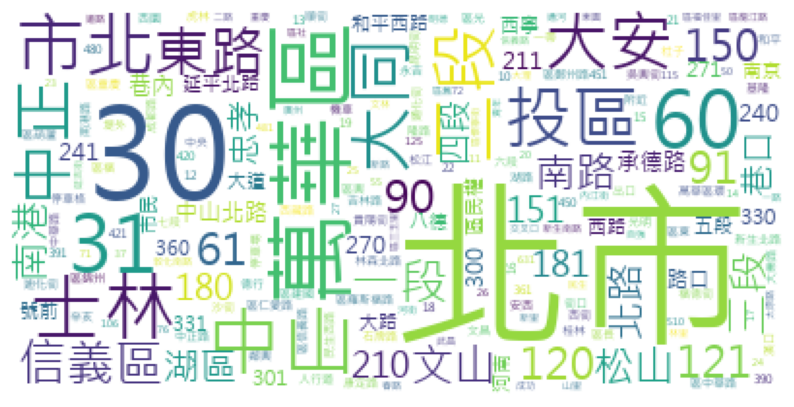

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()